In [14]:
# from lfs_tree import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import pydot
import networkx as nx
from string import Template
import pandas as pd
import glob
import pydot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

from IPython.display import Image, display
import matplotlib.pyplot as plt
# from IPython.display import Image, display

In [15]:
def view_pydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

def show_trees(directory):
    treefiles = glob.glob(f'{directory}*tree_*')
    num_trees_per_strat = len(treefiles)
    for i in range(0, int(num_trees_per_strat)):
        for f in glob.glob(f'{directory}*tree_*_{i}*'):
            file = open(f)
            dot_string = file.read()
            print(f)
#             print(dot_string)
            graph = pydot.graph_from_dot_data(dot_string)[0]
            view_pydot(graph)
            print('\n')
            
def show_stats(directory):
    fs = glob.glob(f'{directory}*experiment_stats')
    df = pd.concat([pd.read_csv(f) for f in fs])
    return df

def determine_shape(x, shape_assignment_dict):
    return shape_assignment_dict[x]

def determine_color(x, color_assignment_dict):
    return color_assignment_dict[x]

def scatter_plots(df, x, y, xlabel, ylabel, title, shape_assignment_dict, color_assignment_dict,
                 first_legend_pos, second_legend_pos, strat_legend_rel_pos, ratio_legend_re_pos):
        
    fig, ax = plt.subplots()
    groups = df.groupby(['strat','complaint_ratio'])
    # Create a scatter plot for each group based on shape and color
    for (strat, ratio), group in groups:
        marker = shape_assignment_dict.get(strat)
        color=color_assignment_dict.get(ratio)
        ax.scatter(group[x], group[y], marker=marker, color=color, label=(strat, ratio))

    # Create separate shape and color legends
    legend_elements_1 = []
    legend_elements_2 = []

    for shape, marker in shape_assignment_dict.items():
        legend_elements_1.append(plt.Line2D([0], [0], marker=marker, color='w', label=shape, markerfacecolor='k'))
    for ratio, color in color_assignment_dict.items():
        legend_elements_2.append(plt.Line2D([0], [0], marker='o', color='w', label=ratio, markerfacecolor=color))

    # Add shape and color legends
    first_legend=ax.legend(handles=legend_elements_1, loc=first_legend_pos, 
                           bbox_to_anchor=strat_legend_rel_pos,
                           title='strategy', 
                           fontsize=13,title_fontsize=14)
    ax.legend(handles=legend_elements_2, loc=second_legend_pos, 
              bbox_to_anchor=ratio_legend_re_pos, title='complaint%',
              fontsize=13, title_fontsize=14)

    ax.add_artist(first_legend)

    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)

    plt.show()
    plt.close(fig)

    
def line_plots(df, x, y, xlabel, ylabel, title, color_assignment_dict, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
        color = color_assignment_dict.get(strat)
        ax.plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.savefig(f'graph_pdfs/{title}.pdf', format='pdf')
    plt.show()
    plt.close(fig)
#     return plt

def box_plot(df, x, y, xlabel, ylabel, title, legend_pos, group_name,
               group_value, gtype='general',
               ylim=None,
              ):
    fig, ax = plt.subplots()
    df=df[df[group_name]==group_value]
    # Create a scatter plot for each group based on shape and color
    groups = df.groupby(['strat'])
    for strat, group in groups:
#         color = color_assignment_dict.get(strat)
        ax.box_plot(group[x], group[y], color=color, label=strat)
    if(gtype=='accuracy'):
        ax.plot(df[x], df['global_accuracy'], color='blue', label='accuracy_before_fix')
    ax.legend()
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=14)
    if(ylim):
        ax.set_ylim(ylim)
    plt.show()
    plt.close(fig)
#     return plt

In [16]:
df_good=show_stats('../good_funcs_results_620/')

In [17]:
df_bad=show_stats('../bad_funcs_results_620/')

In [18]:
df_good

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max
0,information_gain,0.095,1.000000,20,20,0.738,0.500,0.900,0.795,1348,1348,30,0.0,30,29,False,False
0,naive,0.100,1.000000,20,20,0.738,0.500,0.900,0.795,1348,1348,30,0.0,30,29,False,False
0,information_gain,0.306,2.533333,40,40,0.738,0.700,0.975,0.836,1348,1348,30,0.0,30,29,False,False
0,naive,0.197,4.133333,40,40,0.738,0.425,0.950,0.832,1348,1348,30,0.0,30,29,False,False
0,information_gain,1.490,5.466667,80,80,0.738,0.650,0.900,0.841,1348,1348,30,0.0,30,29,False,False
0,naive,0.538,11.466667,80,80,0.738,0.863,0.838,0.734,1348,1348,30,0.0,30,29,False,False
0,information_gain,5.176,7.666667,160,160,0.738,0.731,1.000,0.889,1348,1348,30,0.0,30,29,False,False
0,naive,0.929,25.866667,160,160,0.738,0.912,1.000,0.869,1348,1348,30,0.0,30,29,False,False
0,information_gain,0.109,1.266667,20,20,0.738,0.050,0.950,0.738,1348,1348,30,0.0,30,29,False,False
0,naive,0.100,1.933333,20,20,0.738,0.600,1.000,0.823,1348,1348,30,0.0,30,29,False,False


In [19]:
df_bad

,strat,runtime,avg_tree_size_increase,num_complaints,confirmation_cnt,global_accuracy,fix_rate,confirm_preserve_rate,new_global_accuracy,prev_signaled_cnt,new_signaled_cnt,num_functions,deletion_factor,post_fix_num_funcs,num_of_funcs_processed_by_algo,complaint_reached_max,confirm_reached_max
0,information_gain,0.179,0.750000,20,20,0.44,0.450,1.000,0.450,1240,956,30,0.5,24,29,False,False
0,naive,0.113,0.500000,20,20,0.44,0.500,0.850,0.373,1240,927,30,0.5,20,29,False,False
0,information_gain,0.408,0.869565,40,40,0.44,0.675,0.925,0.623,1240,730,30,0.5,23,29,False,False
0,naive,0.217,0.761905,40,40,0.44,0.700,0.925,0.621,1240,713,30,0.5,21,29,False,False
0,information_gain,1.698,1.153846,80,80,0.44,0.338,0.988,0.497,1240,962,30,0.5,26,29,False,False
0,naive,0.568,0.777778,80,80,0.44,0.800,0.762,0.620,1240,594,30,0.5,18,29,False,False
0,information_gain,6.968,1.181818,160,160,0.44,0.606,0.919,0.628,1240,720,30,0.5,22,29,False,False
0,naive,0.966,0.800000,160,160,0.44,0.625,0.900,0.567,1240,631,30,0.5,15,29,False,False
0,information_gain,0.146,0.846154,20,20,0.44,0.400,1.000,0.484,1240,986,30,0.5,26,29,False,False
0,naive,0.102,0.750000,20,20,0.44,0.450,1.000,0.482,1240,982,30,0.5,24,29,False,False


In [20]:
df_good['strat'] = df_good['strat'].str.replace('information_gain', 'decision tree')
df_good['user_input_size'] = df_good['num_complaints'] + df_good['confirmation_cnt']
df_good['complaint_ratio'] = df_good['num_complaints']/df_good['user_input_size']
df_good['complaint_ratio'] = df_good['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_good['accuracy_improvement'] = df_good['new_global_accuracy']/df_good['global_accuracy']

df_bad['strat'] = df_bad['strat'].str.replace('information_gain', 'decision tree')
df_bad['user_input_size'] = df_bad['num_complaints'] + df_bad['confirmation_cnt']
df_bad['complaint_ratio'] = df_bad['num_complaints']/df_bad['user_input_size']
df_bad['complaint_ratio'] = df_bad['complaint_ratio'].map(lambda x: f'{x * 100:.2f}%')
df_bad['accuracy_improvement'] = df_bad['new_global_accuracy']/df_bad['global_accuracy']


line_color_assignment_dict={'naive':'g','decision tree':'r', 'brute_force': 'b'}

           strat  runtime  avg_tree_size_increase  num_complaints  \
0  decision tree    0.095                1.000000              20   
0          naive    0.100                1.000000              20   
0  decision tree    0.109                1.266667              20   
0          naive    0.100                1.933333              20   
0  decision tree    0.124                1.533333              20   
0          naive    0.113                2.066667              20   
0  decision tree    0.151                1.333333              20   
0          naive    0.100                2.000000              20   
0  decision tree    0.138                1.933333              20   
0          naive    0.105                2.333333              20   
0  decision tree    0.122                0.800000              20   
0          naive    0.112                1.733333              20   
0  decision tree    0.116                1.266667              20   
0          naive    0.098         

/tmp/ipykernel_5348/2175868628.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for (input_size, group) in ggroups:


ValueError: x and y must be the same size

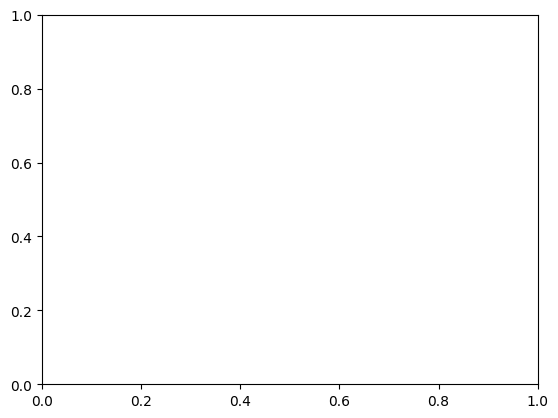

In [24]:
ggroups = df_good.groupby(['user_input_size'])
# Create a scatter plot for each group based on shape and color
color_assignment_dict={'naive':'red', 'information_gain':'blue'}
for (input_size, group) in ggroups:
    print(group)
#     print(group)
    fig, ax = plt.subplots()
#     marker = shape_assignment_dict.get(strat)
#     color=color_assignment_dict.get(strat)
#     print(color)
    ax.scatter(group[group['strat']=='information_gain']['fix_rate'], group[group['strat']=='naive']['fix_rate'], color="red", label=(input_size), s=7)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.legend()
